# Job prospects after graduation

The aim of this project is to explore the varations in salary for university graduates from different majors. 

## The dataset

The dataset, `recent-grads.csv`, was downloaded from [FiveThirtyEight's GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors) on 20/10/2019. 
The data is originally from American Community Survey 2010-2012 Public Use Microdata Series, available [here](http://www.census.gov/programs-surveys/acs/data/pums.html), with documentation [here](http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html). 
It contains a breakdown of basic earnings and laboor force information for studens who graduated from US colleges between 2010 and 2012. 

Each row represents a different major. 
The columns are: 
* `Rank`: rank by median earnings, 
* `Major_code`: major code (FO1DP in ACS PUMS),
* `Major`: description of the major,
* `Major_category`: category of the major, 
* `Total`: total number of people with this major, 
* `Sample_size`: sample size of full-time, year-round workers,
* `Men`: number of male graduates, 
* `Women`: number of female graduates, 
* `ShareWomen`: share of women in the total,
* `Employed`: number of employed people,
* `Full_time`: number of people working 35 hours or more per week,
* `Part_time`: number of people working less than 35 hours per week,
* `Full_time_year_round`: numnber of people employed for at least 50 weeks and working 35 hours or more per week, 
* `Unemployed`: number of unemployed people, 
* `Unemployement_rate`: unemployment rate, 
* `Median`: median earnings (in USD) of full-time, year-round workers, 
* `P25th`: 25th percentile of earnings of full-time, year-round workers,
* `P75th`: 75th percentile of earnings of full-time, year-round workers,
* `College_jobs`: number of people with jobs requiring a college degree, 
* `Non_college_jobs`: number of people with jobs requiring no college degree, 
* `Low_wage_jobs`: number of people in low_wage service jobs.

As this project is mostly concerned with data visualisation, we will make extensive use of the Pandas and Matplotlib libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import the data and view the first few lines:

In [8]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Then the last few lines:

In [9]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


We then use the `describe` function to determine the main properties of each numeric column:

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We notice that the `Total`, `Men`, `Women`, and `ShareWomen` columns are missing one value. 
Let us delete the corresponding row using Pandas' `dropna` function.

In [12]:
recent_grads = recent_grads.dropna()

## Data exploration

Let us explore the data by doing a few scatter plots. 
We define the function `scatter_plot` taking twoo column names and returning a scatter plot of the second vs the first.

In [26]:
def scatter_plot(column_x, column_y):
    '''
    scatter plot of column_y vs column_x for the recent_grads dataframe
    
    column_x: string
    column_y: string
    '''
    ax = recent_grads.plot(x = column_x, y = column_y, kind = 'scatter', 
                           title = '{} vs {}'.format(column_x, column_y),
                           grid = True)

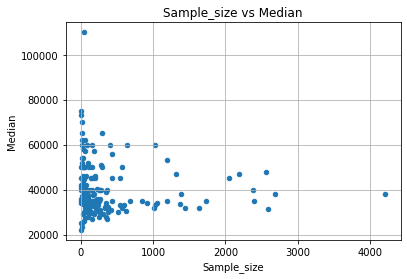

In [27]:
scatter_plot('Sample_size', 'Median')

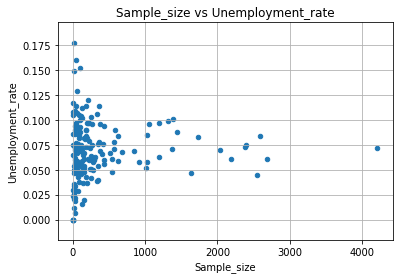

In [28]:
scatter_plot('Sample_size', 'Unemployment_rate')

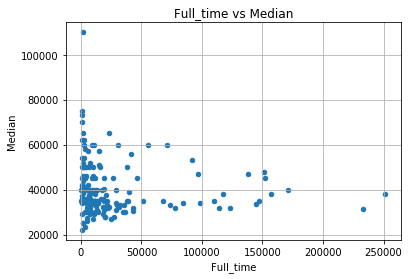

In [29]:
scatter_plot('Full_time', 'Median')

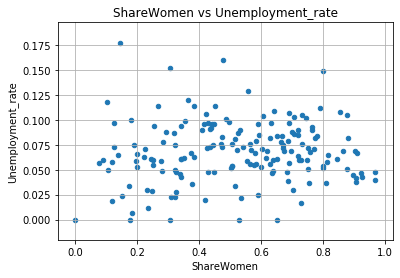

In [30]:
scatter_plot('ShareWomen', 'Unemployment_rate')

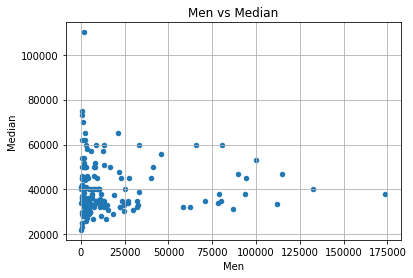

In [31]:
scatter_plot('Men', 'Median')

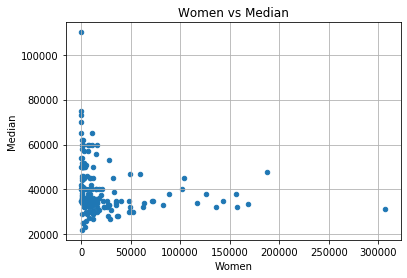

In [33]:
scatter_plot('Women', 'Median')

From these plots, it seems that:
* Students with more popular majors do not tend to make more money than the others.
* People who graduated with majors having a lot of female studnets tend to make less money than those with majors having a lot of male students.
* The median salary tends to decrease when the number of ful-time employees increases.

We now show some histograms to visualize the distribution of values in relevent columns.

In [45]:
def histo(column, bins=10, range=None):
    '''
   histogram of the column 'column' for the recent_grads dataframe
    
    column: string
    bins: int
    range: doublet of ints or floats, or None
    '''
    
    ax = recent_grads[column].hist(bins=bins, range=range)
    ax.set_title(column)
    plt.show()

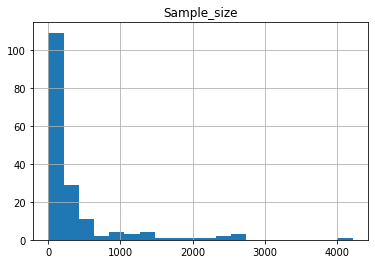

In [50]:
histo('Sample_size', 20)

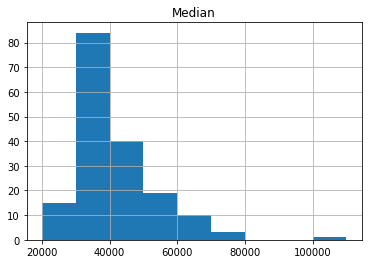

In [78]:
histo('Median', bins=9, range=(20000,110000))

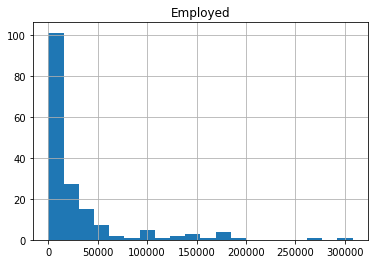

In [60]:
histo('Employed', 20)

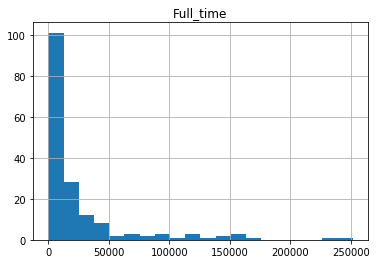

In [62]:
histo('Full_time', 20)

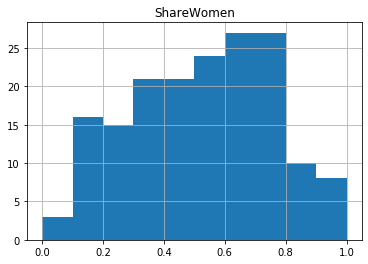

In [75]:
histo('ShareWomen',range=(0,1))

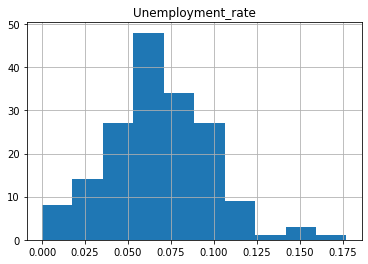

In [67]:
histo('Unemployment_rate')

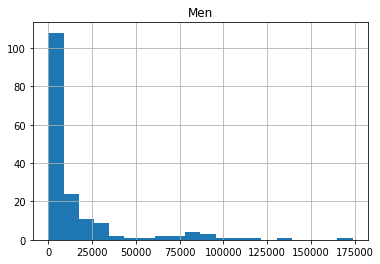

In [69]:
histo('Men',20)

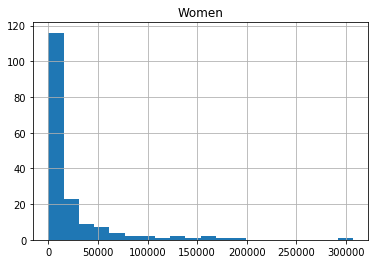

In [70]:
histo('Women',20)

From these plots, it seems that:
* Approximately half of majors have more men than women. 
* Three majors have less than 10% of women, and eight have less than 10% men.
* The most common median salary range is \\$30000 - \\$40000.